# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import statistics

## Load and display the data

In [4]:
#your code here
colnames=['Y'] 
data = pd.read_csv("ground_truth.csv",names=colnames) 
data.head()
data.columns

Index(['Y'], dtype='object')

In [5]:
data2 = pd.read_csv("Tweets.csv") 
data2.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,lang,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,en,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,en,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,en,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,en,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,en,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [6]:
# your code here
data2.shape

(11099, 21)

In [7]:
data2.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count'],
      dtype='object')

In [8]:
data2.nunique()

created_at                  28
id                           1
id_str                       1
text                      9221
truncated                    2
entities                  8300
metadata                    30
source                     172
is_quote_status              2
retweet_count             2347
favorite_count              11
lang                        30
user_name                10140
user_screen_name         10400
user_followers_count      3236
user_friends_count        2880
user_listed_count          514
user_created_at          10400
user_favourites_count     7802
user_verified                2
user_statuses_count       8893
dtype: int64

In [9]:
data2.describe()

,id,id_str,retweet_count,favorite_count,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count
count,1.109900e+04,1.109900e+04,11099.000000,11099.000000,1.109900e+04,11099.000000,11099.000000,11099.000000,1.109900e+04
mean,1.024290e+18,1.024290e+18,2777.956392,0.039463,6.009168e+03,1442.336337,47.017479,19413.978286,3.476254e+04
std,0.000000e+00,0.000000e+00,12180.169923,1.013902,2.013144e+05,7645.949991,254.953725,39144.906425,8.879138e+04
min,1.024290e+18,1.024290e+18,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,1.024290e+18,1.024290e+18,0.000000,0.000000,1.310000e+02,194.000000,0.000000,1052.000000,2.543000e+03
50%,1.024290e+18,1.024290e+18,13.000000,0.000000,4.030000e+02,442.000000,3.000000,5538.000000,9.943000e+03
75%,1.024290e+18,1.024290e+18,428.500000,0.000000,1.249000e+03,1116.000000,19.000000,19576.500000,3.418700e+04
max,1.024290e+18,1.024290e+18,413719.000000,101.000000,2.021186e+07,510292.000000,12895.000000,635920.000000,2.848360e+06


In [10]:
data2['lang'].unique()

array(['en', 'zh', 'in', 'tl', 'ja', 'es', 'ko', 'und', 'th', 'fr', 'ru',
       'sl', 'tr', 'pt', 'vi', 'ro', 'de', 'it', 'ca', 'ht', 'nl', 'et',
       'ar', 'pl', 'ur', 'fa', 'sv', 'fi', 'el', 'hi'], dtype=object)

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

In [12]:
data3 = data2
data3['Y'] = data['Y']
data3.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count,Y
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308,0.0
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272,0.0
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731,1.0
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153,0.0
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503,1.0


In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

In [14]:
data3.head()
data3.shape
# copy the data
# df_min_max_scaled = data2.copy()
cols = ["user_followers_count","truncated","is_quote_status","retweet_count","favorite_count","user_followers_count","user_friends_count","user_listed_count","user_favourites_count","user_verified","user_statuses_count"]
# df_min_max_scaled['truncated'] = data3['truncated'].astype(int)
# df_min_max_scaled['is_quote_status'] = data3['truncated'].astype(int)
# df_min_max_scaled['user_verified'] = data3['truncated'].astype(int)
# apply normalization techniques
# for column in cols:
#     df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 

In [15]:
data2['user_listed_count'].corr(data3['Y'])

-0.04756924265135248

In [16]:
cols = ["truncated","is_quote_status","retweet_count","favorite_count","user_friends_count","user_listed_count","user_favourites_count","user_verified","user_statuses_count","user_followers_count"]
# data3['truncated'] = data3['truncated'].astype(int)
# data3['is_quote_status'] = data3['truncated'].astype(int)
# data3['user_verified'] = data3['truncated'].astype(int)
# data3.loc[data3['is_quote_status'] == False, 'is_quote_status'] = 0
# data3.loc[data3['is_quote_status'] == True, 'is_quote_status'] = 1
# data3.loc[data3['user_verified'] == False, 'user_verified'] = 0
# data3.loc[data3['user_verified'] == True, 'user_verified'] = 1
data3.head()
data4 = data3
data4['Y'] = data3['Y'].astype("float32")
for x in cols:
    print(x,data3[x].corr(data4['Y']))

  

truncated -0.11929094792133631
is_quote_status 0.10430164622161725
retweet_count 0.5185632196825335
favorite_count -0.011280653760368
user_friends_count -0.035524594255068855
user_listed_count -0.04756924265135248
user_favourites_count -0.025774571951100524
user_verified -0.03668163057577378
user_statuses_count -0.050883700056942587
user_followers_count -0.008030201664907477


## Part-1
*Vectorize tweets using only meta data*

In [17]:
import ast
def get_features(data3):
  num = []
  for entity in data3['entities']:
    # tags = ""
    count = 0
    for tag in ast.literal_eval(entity)['hashtags']:
      # tags+=tag['text']+" "
      count = count + 1
    # hashes.append(tags[:-1])
    num.append(count)
  # df = data3.assign(hashtags=hashes)
  df = data3.assign(numberh=num)
  df['user_mentions'] = [len(ast.literal_eval(entity)['user_mentions']) for entity in df['entities']]
  df['truncated'] = df['truncated'].astype(int)
  df['is_quote_status'] = df['is_quote_status'].astype(int)
  df['user_verified'] = df['user_verified'].astype(int)
  df2=df[['truncated','is_quote_status','retweet_count','favorite_count','user_friends_count','user_listed_count','user_favourites_count','user_verified','user_statuses_count','numberh',"user_followers_count"]]
  # df2.head()
  # df2.describe()
  return df2
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """


  # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [18]:
# your code here
dff = get_features(data3)
data3['user_mentions'] = [len(ast.literal_eval(entity)['user_mentions']) for entity in data3['entities']]
print(data3['user_mentions'].corr(data3['Y']))
df_min_max_scaled = dff.copy()
for column in df_min_max_scaled.columns:
    if column == 'truncated' or column == 'user_verified' or column == 'is_quote_status':
      continue
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
df_min_max_scaled.head()


-0.00782668047864197


,truncated,is_quote_status,retweet_count,favorite_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,numberh,user_followers_count
0,0,0,0.000273,0.0,0.000517,0.000543,0.051868,0,0.010991,0.0,0.000008
1,0,0,0.014266,0.0,0.000749,0.000931,0.010454,0,0.030639,0.1,0.000039
2,0,0,0.009052,0.0,0.000482,0.000078,0.008533,0,0.000607,0.0,0.000013
3,0,0,0.000024,0.0,0.004758,0.000310,0.009424,0,0.000756,0.0,0.000120
4,0,0,0.061167,0.0,0.001415,0.000543,0.009883,0,0.011762,0.0,0.000016


In [19]:
df_min_max_scaled['numberh'].corr(data3['Y'])

-0.05460209950230081

In [20]:
dfr = data['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_min_max_scaled, dfr, test_size=0.2)

In [21]:
# X_train.shape

# type(y_train)
y_train.shape
y_train.head()

7968    0.0
8914    0.0
7813    0.0
2023    0.0
306     0.0
Name: Y, dtype: float64

In [22]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3, radius=0.4)
neigh.fit(X_train,y_train)

NearestNeighbors(n_neighbors=3, radius=0.4)

In [23]:
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import matplotlib.pyplot as plt
accu = []
xx = []
# for i in range(1,10):
  # neigh = NearestNeighbors(n_neighbors=i, radius=0.4)
  # neigh.fit(X_train,y_train)
results = []
for y in y_train:
    results.append(y)
# print(results)
# res = neigh.kneighbors(X_test, 2, return_distance=False)
# print(y_test.shape)
# print(X_test.shape)
# print(y_train.shape)
distances,indices = neigh.kneighbors(X_test)
print(indices.shape)
y_pred =[]
# print(indices)
print(len(results))
for i in indices:
  count0 = 0
  count1 = 0
  for j in i:
    if y_train.iloc[j] ==  0:
      count0 = count0 + 1
    else:
      count1 = count1 + 1
  if count1 > count0:
    y_pred.append(1)
  else:
    y_pred.append(0)
print(len(y_pred))
  # y_pred.head()
  # y_pred.unique()
  # y_pred.describe()
  
#   y_pred_f = []
#   for i in y_test:
#     y_pred_f.append(i)
#   accu.append(metrics.accuracy_score(y_pred,y_pred_f))
#   xx.append(i)
# xpoints = np.array(accu)
# ypoints = np.array(xx)

# plt.plot(xpoints, ypoints)
# print(accu)


# y_f_pred = pd.Series(y_pred)
# y_f_test = pd.Series(y_test)



(2220, 3)
8879
2220


In [24]:
from sklearn import metrics
y_pred_f = []
for i in y_test:
  y_pred_f.append(i)

# y_f_pred = pd.Series(y_pred)
# y_f_test = pd.Series(y_test)
print(metrics.accuracy_score(y_pred,y_pred_f))

0.959009009009009


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.9513513513513514, 0.9509009009009008, 0.959009009009009, 0.9576576576576576, 0.959009009009009, 0.959009009009009, 0.959009009009009, 0.9621621621621622, 0.9603603603603603, 0.9599099099099099, 0.9599099099099099, 0.9603603603603603, 0.959009009009009, 0.9594594594594594, 0.9581081081081081, 0.9594594594594594, 0.9594594594594594, 0.9594594594594594, 0.959009009009009, 0.9585585585585585, 0.959009009009009, 0.959009009009009, 0.9585585585585585, 0.9594594594594594, 0.9599099099099099, 0.9599099099099099, 0.9585585585585585, 0.9576576576576576, 0.9572072072072072, 0.9581081081081081, 0.9581081081081081, 0.9585585585585585, 0.9581081081081081, 0.9581081081081081, 0.9572072072072072, 0.9558558558558559, 0.9563063063063063, 0.9567567567567568, 0.9572072072072072, 0.954954954954955, 0.9563063063063063, 

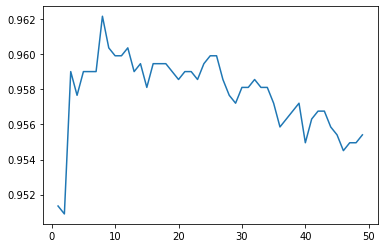

In [25]:
accu = []
xx = []
maxk = 0
maxa = 0
for i in range(1,50):
  neigh = NearestNeighbors(n_neighbors=i, radius=0.4)
  xx.append(i)
  neigh.fit(X_train,y_train)
  results = []
  for y in y_train:
      results.append(y)
  # print(results)
  # # res = neigh.kneighbors(X_test, 2, return_distance=False)
  # print(y_test.shape)
  # print(X_test.shape)
  # print(y_train.shape)
  distances,indices = neigh.kneighbors(X_test)
  # print(indices.shape)
  y_pred =[]
  # print(indices)
  # print(len(results))
  for i in indices:
    count0 = 0
    count1 = 0
    for j in i:
      if y_train.iloc[j] ==  0:
        count0 = count0 + 1
      else:
        count1 = count1 + 1
    if count1 > count0:
      y_pred.append(1)
    else:
      y_pred.append(0)
        
  y_pred_f = []
  for i in y_test:
    y_pred_f.append(i)
  accu.append(metrics.accuracy_score(y_pred,y_pred_f))
  metrics.accuracy_score(y_pred,y_pred_f)
  if maxa < metrics.accuracy_score(y_pred,y_pred_f):
    maxa =  metrics.accuracy_score(y_pred,y_pred_f)
    maxk = xx[-1];
xpoints = np.array(accu)
ypoints = np.array(xx)

plt.plot(ypoints, xpoints)
print(xx)
print(accu)
print(maxk)
print(maxa)

    



## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [26]:
from sklearn.decomposition import TruncatedSVD
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize,sent_tokenize

def clean(x):
  # tweet = "@__therealanna @heyitsrose let's have a https://www.java2blog.com/ zoom meeting tonite! #quarantinelife #girlsnight #onlinehangout  "
  clean_tweet = re.sub("@[A-Za-z0-9_]+","", x)
  clean_tweet = re.sub("#[A-Za-z0-9_]+","", clean_tweet)
  # clean_tweet = re.sub("â[A-Za-z0-9_]+","", clean_tweet)
  # clean_tweet = re.sub("€™[A-Za-z0-9_]+","", clean_tweet)
  clean_tweet = re.sub(r'http://\S+|https://\S+',"", clean_tweet)
  tokenize_words = word_tokenize(clean_tweet)
  tokenize_words_not_stop_words=""
  for word in tokenize_words:
    if word not in stop_words:
      tokenize_words_not_stop_words += " "+word
  return tokenize_words_not_stop_words

  # print(clean_tweet)
  # return clean_tweet

# print(data2.head())

# X_test_final = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(dt)

# tweet = "@__therealanna @heyitsrose let's have a zoom meeting tonite! #quarantinelife #girlsnight #onlinehangout"
def tweet_vectoriser(data2):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  dff['cleantext'] = data2['text'].apply(lambda x: clean(x))
  vectorizer = TfidfVectorizer()
  X_tr = vectorizer.fit_transform(dff['cleantext'])

  # print(X_tr)
  # pca = PCA(n_components = 25)
  # X_train_final = pca.fit_transform(X_tr)
  svd = TruncatedSVD(n_components=25, random_state=42)
  dt = svd.fit_transform(X_tr)
  return dt
  


  # your code here

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [27]:
# your code here
from sklearn.preprocessing import MinMaxScaler
df3 = tweet_vectoriser(data2)
# df3_min_max_scaled = df3
scaler = MinMaxScaler()
d3_min_max_scaled = scaler.fit_transform(df3)
# for column in df3_min_max_scaled.columns:
#   df3_min_max_scaled[column] = (df3_min_max_scaled[column] - df3_min_max_scaled[column].min()) / (df3_min_max_scaled[column].max() - df3_min_max_scaled[column].min()) 
# print(d3_min_max_scaled)
df3_min_max_scaled= pd.DataFrame(d3_min_max_scaled)
df3_min_max_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.049012,0.424935,0.330386,0.521296,0.385213,0.324663,0.100935,0.156192,0.414558,0.231648,...,0.344024,0.427313,0.194972,0.379185,0.455744,0.216358,0.487336,0.407627,0.456933,0.297901
1,0.336383,1.000000,0.000000,0.000000,0.378327,0.232421,0.036162,0.245636,0.177662,0.237260,...,0.359785,0.401352,0.226000,0.423178,0.475885,0.228218,0.482062,0.435675,0.424906,0.287740
2,0.481133,0.241490,0.307743,0.419871,0.418949,0.280684,0.094632,0.155191,0.275941,0.195919,...,0.349817,0.440078,0.219937,0.364180,0.475463,0.193892,0.610927,0.374494,0.332448,0.326704
3,0.114663,0.479586,0.338380,0.547800,0.390480,0.366655,0.101179,0.125343,0.585778,0.250665,...,0.340098,0.445343,0.248372,0.383873,0.509677,0.260871,0.424733,0.438005,0.415304,0.308328
4,0.083521,0.430653,0.358825,0.642835,0.368750,0.263769,0.082125,0.377953,0.264966,0.078448,...,0.352629,0.502027,0.604158,0.000000,0.257487,0.353953,0.000000,0.070695,0.073456,0.433425


In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df3_min_max_scaled, dfr, test_size=0.2)

In [29]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, radius=0.4)
neigh.fit(X_train2,y_train2)

NearestNeighbors(radius=0.4)

In [30]:
results = []
for y in y_train2:
    results.append(y)
# print(results)
# res = neigh.kneighbors(X_test, 2, return_distance=False)
# print(y_test2.shape)
# print(X_test2.shape)
# print(y_train2.shape)
distances,indices = neigh.kneighbors(X_test2)
print(indices.shape)
y_pred =[]
# print(indices)
print(len(results))
for i in indices:
  count0 = 0
  count1 = 0
  for j in i:
    if y_train2.iloc[j] ==  0:
      count0 = count0 + 1
    else:
      count1 = count1 + 1
  if count1 > count0:
    y_pred.append(1)
  else:
    y_pred.append(0)
print(len(y_pred))

(2220, 5)
8879
2220


In [31]:
from sklearn import metrics
y_pred_f = []
for i in y_test2:
  y_pred_f.append(i)

# y_f_pred = pd.Series(y_pred)
# y_f_test = pd.Series(y_test)
print(metrics.accuracy_score(y_pred,y_pred_f))

0.9315315315315316


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.9117117117117117, 0.9333333333333333, 0.9342342342342342, 0.9351351351351351, 0.9315315315315316, 0.9292792792792792, 0.9301801801801802, 0.9324324324324325, 0.9310810810810811, 0.9301801801801802, 0.9297297297297298, 0.931981981981982, 0.931981981981982, 0.9328828828828829, 0.9315315315315316, 0.931981981981982, 0.931981981981982, 0.9292792792792792, 0.9292792792792792, 0.9279279279279279, 0.9279279279279279, 0.9279279279279279, 0.9279279279279279, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9265765765765765, 0.9261261261261261, 0.9261261261261261, 0.9261261261261261, 0.9261261261261261, 0.9261261261261261, 0.9261261261261

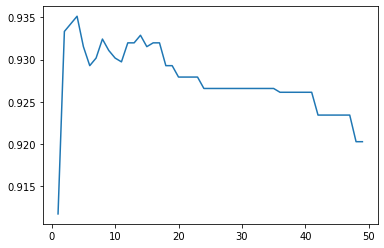

In [32]:
accu = []
xx = []
maxk = 0
maxa = 0
for i in range(1,50):
  neigh = NearestNeighbors(n_neighbors=i, radius=0.4)
  xx.append(i)
  neigh.fit(X_train2,y_train2)
  results = []
  for y in y_train2:
      results.append(y)
  # print(results)
  # # res = neigh.kneighbors(X_test, 2, return_distance=False)
  # print(y_test.shape)
  # print(X_test.shape)
  # print(y_train.shape)
  distances,indices = neigh.kneighbors(X_test2)
  # print(indices.shape)
  y_pred =[]
  # print(indices)
  # print(len(results))
  for i in indices:
    count0 = 0
    count1 = 0
    for j in i:
      if y_train2.iloc[j] ==  0:
        count0 = count0 + 1
      else:
        count1 = count1 + 1
    if count1 > count0:
      y_pred.append(1)
    else:
      y_pred.append(0)
        
  y_pred_f = []
  for i in y_test2:
    y_pred_f.append(i)
  accu.append(metrics.accuracy_score(y_pred,y_pred_f))
  metrics.accuracy_score(y_pred,y_pred_f)
  if maxa < metrics.accuracy_score(y_pred,y_pred_f):
    maxa =  metrics.accuracy_score(y_pred,y_pred_f)
    maxk = xx[-1];
xpoints = np.array(accu)
ypoints = np.array(xx)

plt.plot(ypoints, xpoints)
print(xx)
print(accu)
print(maxk)
print(maxa)


## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [33]:
# your code here
dfff2 = tweet_vectoriser(data2)
dfff2 = pd.DataFrame(dfff2)
dfff1 =  get_features(data3)
df_min_max_scaled3 = dfff1.copy()
cols.append("numberh")
for column in cols:
    df_min_max_scaled3[column] = (df_min_max_scaled3[column] - df_min_max_scaled3[column].min()) / (df_min_max_scaled3[column].max() - df_min_max_scaled3[column].min()) 
df_all_cols = pd.concat([df_min_max_scaled3, dfff2], axis = 1)
df_all_cols

,truncated,is_quote_status,retweet_count,favorite_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,numberh,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.000273,0.0,0.000517,0.000543,0.051868,0.0,0.010991,0.0,...,-0.009940,0.006467,-0.011092,-0.010616,-0.010302,-0.011985,0.003739,-0.005036,0.015391,0.004639
1,0.0,0.0,0.014266,0.0,0.000749,0.000931,0.010454,0.0,0.030639,0.1,...,0.007087,-0.016582,0.012661,0.016931,0.004468,-0.003240,0.000299,0.012199,0.000997,-0.002999
2,0.0,0.0,0.009052,0.0,0.000482,0.000078,0.008533,0.0,0.000607,0.0,...,-0.003682,0.017800,0.008020,-0.020011,0.004159,-0.028551,0.084364,-0.025394,-0.040556,0.026289
3,0.0,0.0,0.000024,0.0,0.004758,0.000310,0.009424,0.0,0.000756,0.0,...,-0.014180,0.022475,0.029788,-0.007680,0.029248,0.020837,-0.037100,0.013630,-0.003318,0.012476
4,0.0,0.0,0.061167,0.0,0.001415,0.000543,0.009883,0.0,0.011762,0.0,...,-0.000644,0.072800,0.302153,-0.248041,-0.155689,0.089471,-0.314177,-0.212066,-0.156954,0.106507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,0.0,0.0,0.000012,0.0,0.002651,0.000543,0.124464,0.0,0.002279,0.2,...,-0.004334,-0.003462,-0.003968,-0.010900,0.005868,0.001689,0.005539,0.009949,0.008709,-0.003159
11095,0.0,0.0,0.020287,0.0,0.001174,0.000931,0.003191,0.0,0.001778,0.0,...,-0.002513,-0.022501,0.048930,0.128106,-0.027777,0.014310,-0.060565,0.011721,-0.010590,0.033502
11096,0.0,0.0,0.000000,0.0,0.000184,0.000000,0.000142,0.0,0.001497,0.0,...,-0.002050,-0.002059,0.002886,0.000529,0.002181,-0.005422,0.002617,-0.003987,0.002847,0.004854
11097,0.0,0.0,0.000044,0.0,0.000476,0.000620,0.024891,0.0,0.004776,0.0,...,-0.007308,-0.016877,-0.015303,-0.009027,-0.029775,-0.023802,0.020446,-0.009394,0.018628,0.010711


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [34]:
# your code here
df4_min_max_scaled = scaler.fit_transform(df_all_cols)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df4_min_max_scaled, dfr, test_size=0.2)

In [36]:
neigh = NearestNeighbors(n_neighbors=3, radius=0.4)
neigh.fit(X_train3,y_train3)

NearestNeighbors(n_neighbors=3, radius=0.4)

In [37]:
results = []
for y in y_train3:
    results.append(y)
# print(results)
# res = neigh.kneighbors(X_test, 2, return_distance=False)
# print(y_test3.shape)
# print(X_test3.shape)
# print(y_train3.shape)
distances,indices = neigh.kneighbors(X_test3)
print(indices.shape)
y_pred =[]
# print(indices)
print(len(results))
for i in indices:
  count0 = 0
  count1 = 0
  for j in i:
    if y_train3.iloc[j] ==  0:
      count0 = count0 + 1
    else:
      count1 = count1 + 1
  if count1 > count0:
    y_pred.append(1)
  else:
    y_pred.append(0)
print(len(y_pred))

(2220, 3)
8879
2220


In [38]:
from sklearn import metrics
y_pred_f = []
for i in y_test3:
  y_pred_f.append(i)

# y_f_pred = pd.Series(y_pred)
# y_f_test = pd.Series(y_test)
print(metrics.accuracy_score(y_pred,y_pred_f))

0.9391891891891891


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.9238738738738739, 0.940990990990991, 0.9391891891891891, 0.9454954954954955, 0.9477477477477477, 0.9454954954954955, 0.945045045045045, 0.9463963963963964, 0.9454954954954955, 0.9432432432432433, 0.9436936936936937, 0.9423423423423424, 0.9432432432432433, 0.9414414414414415, 0.9418918918918919, 0.9414414414414415, 0.9427927927927928, 0.940990990990991, 0.940990990990991, 0.9387387387387387, 0.94009009009009, 0.9373873873873874, 0.9382882882882883, 0.936036036036036, 0.9378378378378378, 0.936036036036036, 0.9355855855855856, 0.9342342342342342, 0.9351351351351351, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9328828828828829, 0.9324324324324325, 0.9324324324324325, 0.9310810810810811, 0.9315315315315316, 0.9310810810810811, 0.9315315315315316, 0.9310810810810811, 0.9315315315315316,

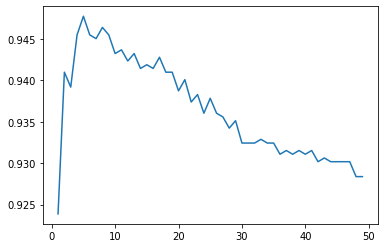

In [39]:
accu = []
xx = []
maxk = 0
maxa = 0
for i in range(1,50):
  neigh = NearestNeighbors(n_neighbors=i, radius=0.4)
  xx.append(i)
  neigh.fit(X_train3,y_train3)
  results = []
  for y in y_train3:
      results.append(y)
  # print(results)
  # # res = neigh.kneighbors(X_test, 2, return_distance=False)
  # print(y_test.shape)
  # print(X_test.shape)
  # print(y_train.shape)
  distances,indices = neigh.kneighbors(X_test3)
  # print(indices.shape)
  y_pred =[]
  # print(indices)
  # print(len(results))
  for i in indices:
    count0 = 0
    count1 = 0
    for j in i:
      if y_train3.iloc[j] ==  0:
        count0 = count0 + 1
      else:
        count1 = count1 + 1
    if count1 > count0:
      y_pred.append(1)
    else:
      y_pred.append(0)
        
  y_pred_f = []
  for i in y_test3:
    y_pred_f.append(i)
  accu.append(metrics.accuracy_score(y_pred,y_pred_f))
  metrics.accuracy_score(y_pred,y_pred_f)
  if maxa < metrics.accuracy_score(y_pred,y_pred_f):
    maxa =  metrics.accuracy_score(y_pred,y_pred_f)
    maxk = xx[-1];
xpoints = np.array(accu)
ypoints = np.array(xx)

plt.plot(ypoints, xpoints)
print(xx)
print(accu)
print(maxk)
print(maxa)


### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

In the first part,I have used the features which have significant correlation between output label.And Extracted two features namely 'number of hashtags' and 'user_mentions' but after seeing corelation of them I only chose 'number of hastags' and got 0.9563063063063063 accuracy using 11 features(excluding user_mensions)

In the second part, I have first removed links,hashtags and user mentions from texts and then removed the stop words(english) then used tf-idf vectorizer for getting features and then done dimentionality reduction using SVDtruncated to reduce the number of features to 25.
I got an accuracy of 0.9391891891891891 using 25 features.

In the third part,I have used(11 + 25 =) 36 features for predicted the output.
I got 0.9504504504504504 accuracy using 36 features.

---

